In [1]:
import numpy as np 
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [52]:
train=pd.read_csv("train.csv",index_col="PassengerId")  #定义PassengerId为第一列，方便之后将其指定为横轴进行绘图
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='PassengerId'>

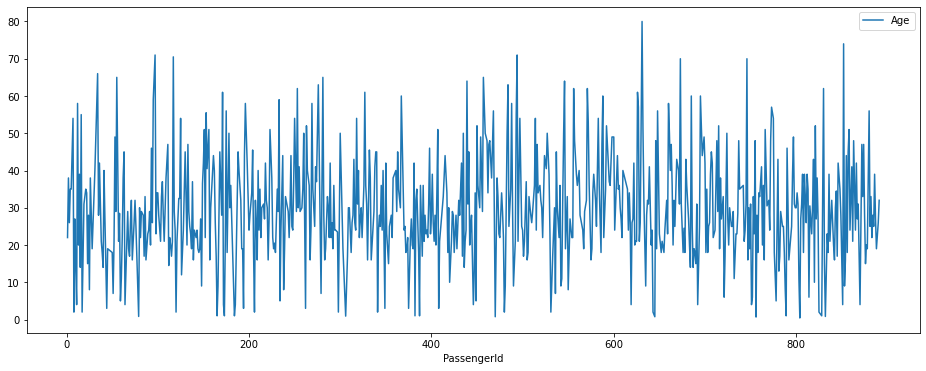

In [3]:
plt.figure(figsize=(16,6))
sns.lineplot(data=train[["Age"]])

Text(0.5, 0, 'PassengerId')

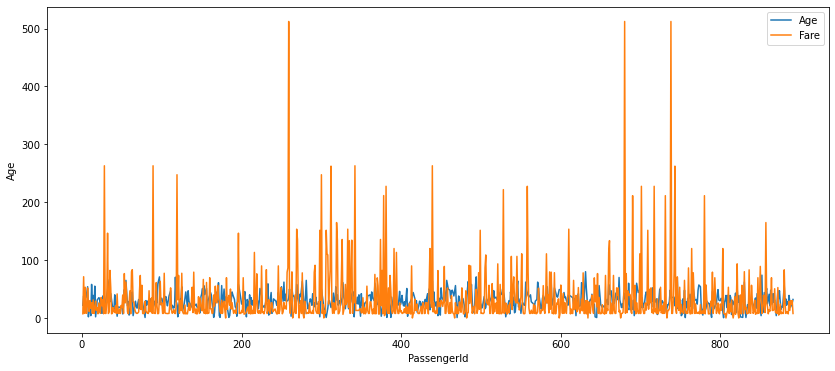

In [4]:

plt.figure(figsize=(14,6))
sns.lineplot(data=train["Age"],label="Age")
sns.lineplot(data=train["Fare"],label="Fare")
plt.xlabel("PassengerId")

Text(0, 0.5, 'AGE')

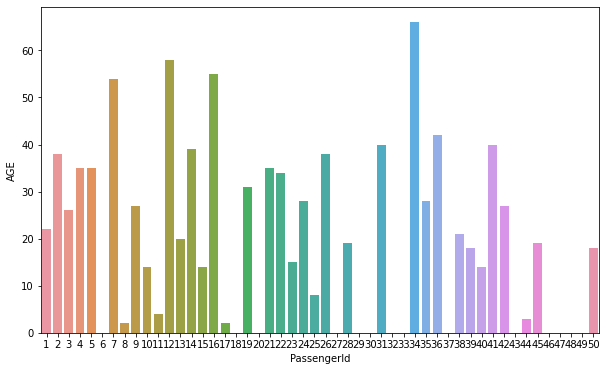

In [5]:
#柱状图
plt.figure(figsize=(10,6))
sns.barplot(x=train.index[0:50],y=train["Age"][0:50])
plt.ylabel("AGE")

<AxesSubplot:ylabel='PassengerId'>

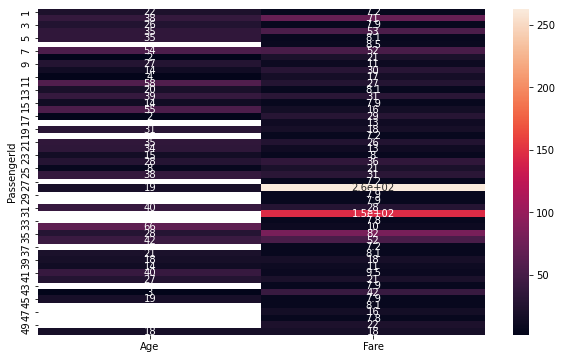

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(data=train[["Age","Fare"]][0:50],annot=True)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

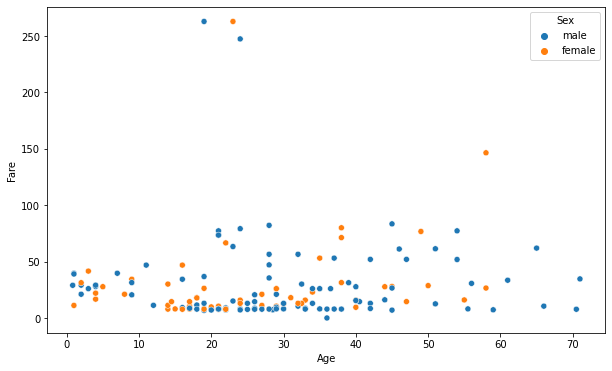

In [7]:
#散点图
plt.figure(figsize=(10,6))
sns.scatterplot(x=train["Age"][0:200],y=train["Fare"][0:200],hue=train["Sex"][0:200])

D:\anaconda\envs\python36\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survived', ylabel='Age'>

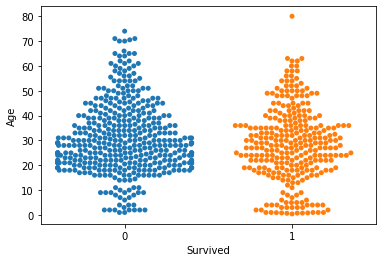

In [11]:
#对比散点图
sns.swarmplot(x=train["Survived"],y=train["Age"])

D:\anaconda\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

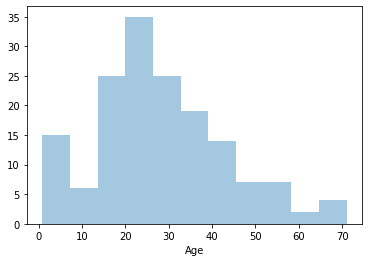

In [12]:
#直方图
sns.distplot(a=train["Age"][0:200],kde=False)

<AxesSubplot:xlabel='Age', ylabel='Density'>

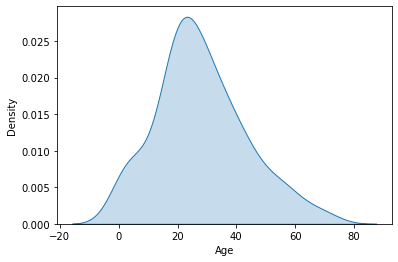

In [14]:
#概率密度
sns.kdeplot(data=train["Age"][0:200],shade=True)

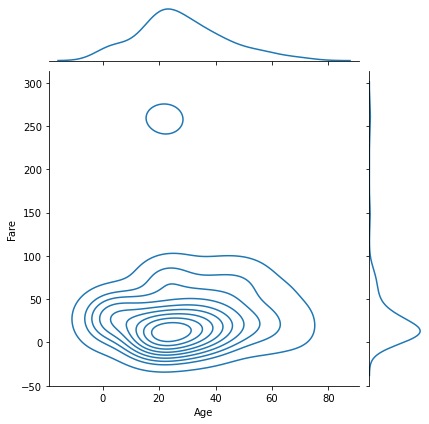

In [16]:
#2d 图
sns.jointplot(x=train["Age"][0:200],y=train["Fare"][0:200],kind="kde")

0    549
1    342
Name: Survived, dtype: int64

In [53]:
#利用回归模型 来填补空缺值
from sklearn.ensemble import RandomForestRegressor
data_age=train[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
age_train=data_age.loc[train["Age"].notnull()]
age_test=data_age.loc[train["Age"].isnull()]

X_age_train=age_train[['Fare', 'Parch', 'SibSp', 'Pclass']]
y_age_train=age_train["Age"]

X_age_test=age_test[['Fare', 'Parch', 'SibSp', 'Pclass']]

rfr=RandomForestRegressor()
rfr.fit(X_age_train,y_age_train)

age_predict=rfr.predict(X_age_test)
train.loc[train["Age"].isnull(),["Age"]]=age_predict


RandomForestRegressor()

In [55]:
test=pd.read_csv("test.csv",index_col="PassengerId")
none_cloum=test["Age"].isnull()
age_test=test.loc[none_cloum,['Fare', 'Parch', 'SibSp', 'Pclass']]

age_predict_test=rfr.predict(age_test)
test.loc[none_cloum,["Age"]]=age_predict_test

In [60]:
#分组查看
train.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex'>

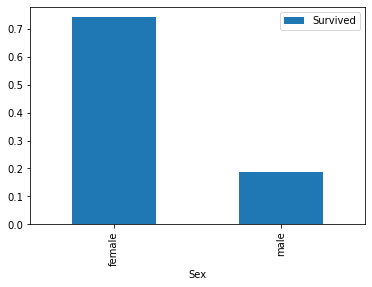

In [64]:
train[["Sex","Survived"]].groupby(["Sex"]).mean().plot.bar()

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

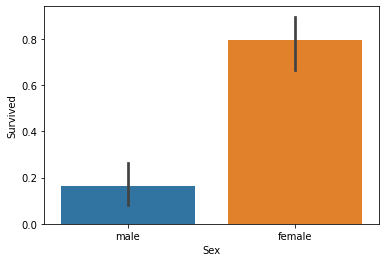

In [73]:
sns.barplot(x=train.Sex[0:100],y=train["Survived"][0:100])

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

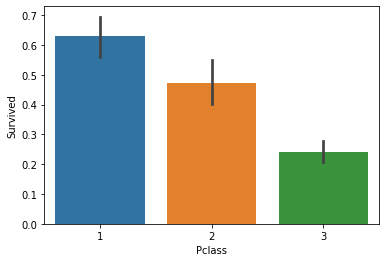

In [75]:
sns.barplot(x=train.Pclass,y=train["Survived"])

<AxesSubplot:xlabel='Pclass,Sex'>

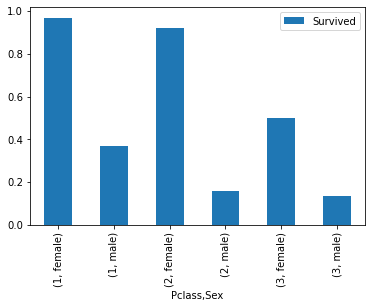

In [78]:
train[["Sex","Pclass","Survived"]].groupby(["Pclass","Sex"]).mean().plot.bar()

<AxesSubplot:xlabel='Pclass,Sex'>

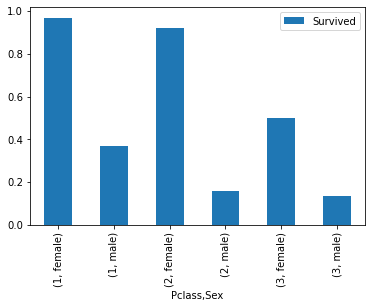

In [103]:
by_pclass_sex=train[["Sex","Pclass","Survived"]].groupby(["Pclass","Sex"]).mean()
by_pclass_sex.plot(kind = 'bar')

In [83]:
train[["Sex","Pclass","Survived"]].groupby(["Pclass","Sex"]).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

D:\anaconda\envs\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\anaconda\envs\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='Age'>

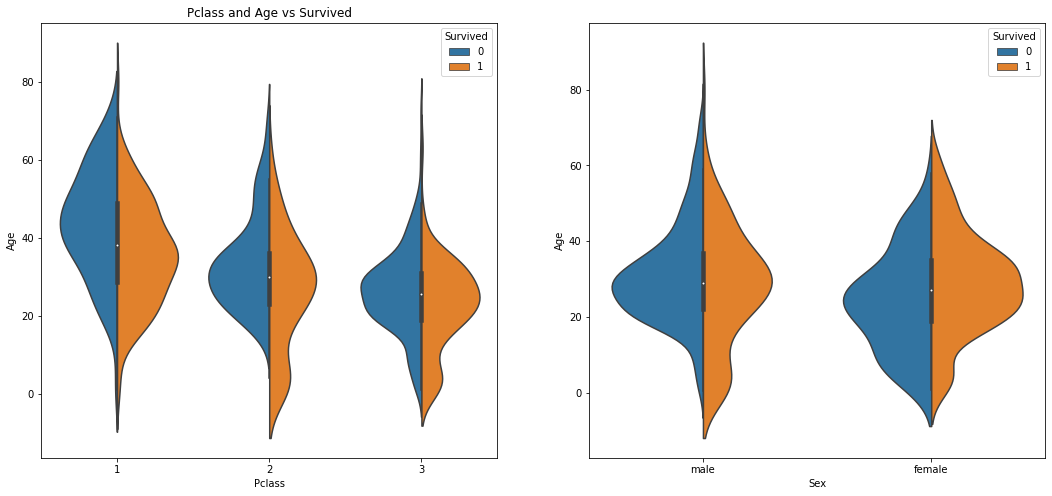

In [92]:
#根据离散值进行分类 对连续值绘概率分布图
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=train,split=True,ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")

sns.violinplot("Sex","Age",hue="Survived",data=train,split=True,ax=ax[1])


D:\anaconda\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

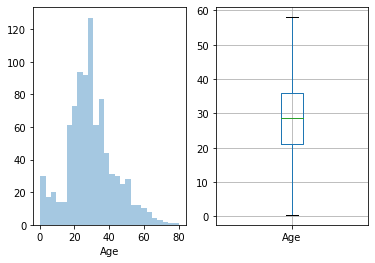

In [94]:
plt.subplot(121)
sns.distplot(a=train["Age"],kde=False)

plt.subplot(122)
#第一分位数 中位数 第三分位数
train.boxplot(column="Age",showfliers=False)

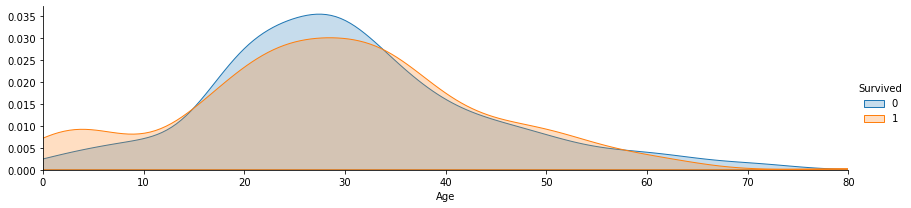

In [100]:
#在单一离散情况下 分布

facet=sns.FacetGrid(train,hue="Survived",aspect=4)
#选择画什么类型图和什么数据
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train["Age"].max()))
#添加图例说明
facet.add_legend()

<AxesSubplot:xlabel='Age_int', ylabel='Survived'>

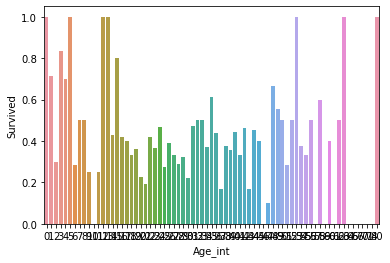

In [106]:
train["Age_int"]=train["Age"].astype(int)
averge_survived_age=train[["Age_int","Survived"]].groupby("Age_int",as_index=False).mean()
sns.barplot(x="Age_int",y="Survived",data=averge_survived_age)

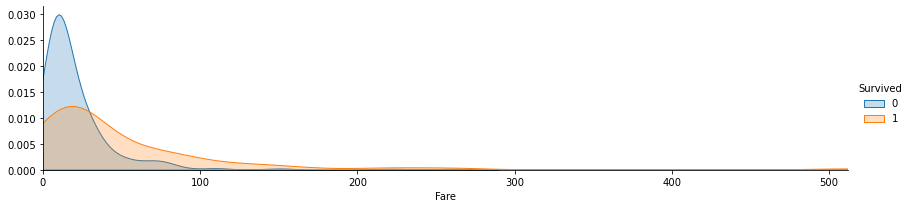

In [108]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
#选择画什么类型图和什么数据
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(0,train["Fare"].max()))
#添加图例说明
facet.add_legend()

In [109]:
train["Title"]=train["Name"].map(lambda x:x.split(",")[1].split(".")[0].strip())
train["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Don               1
Lady              1
Mme               1
the Countess      1
Capt              1
Sir               1
Jonkheer          1
Ms                1
Name: Title, dtype: int64

In [111]:
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

train['Title']=train['Title'].map(TitleDict)
train['Title'].value_counts()

Mr         517
Miss       184
Mrs        127
Master      41
Officer     18
Royalty      4
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='Survived'>

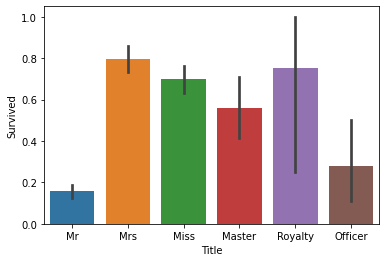

In [112]:
sns.barplot(data=train,x="Title",y="Survived")